In [2]:
import shift
import sys
import time
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import os
import statistics
import math

In [55]:
trader = shift.Trader("bkrupa")
trader.connect("initiator.cfg","buhz7JvL")

True

In [56]:
trader.subAllOrderBook()

True

In [44]:
bp = trader.getBestPrice("AAPL")
T = 600
bid_ask = pd.DataFrame(columns = ["BidPrice","AskPrice","LastPrice"])
n = 20
results = []
for i in range(6):
    BB = pd.DataFrame()
    for j in range(T):
        bp = trader.getBestPrice("AAPL")
        bid_ask = bid_ask.append({'BidPrice':bp.getBidPrice(), 'AskPrice':bp.getAskPrice(), 'LastPrice':trader.getLastPrice("NFLX")},ignore_index = True)
        bid_ask['LogRet'] = np.log(bid_ask.LastPrice) - np.log(bid_ask.LastPrice.shift(1))
        time.sleep(1)
        
    BB['TP'] = (bid_ask.BidPrice + bid_ask.AskPrice + bid_ask.LastPrice)/3
    BB['MA'] = bid_ask.LastPrice.rolling(n).mean()
    BB['sigma'] = bid_ask.LastPrice.rolling(n).std()
    BB['Upper'] = BB.MA + BB.sigma
    BB['Lower'] = BB.MA - BB.sigma
    BB['Buy'] = np.where((bid_ask.LastPrice.shift(1) >= BB.Lower.shift(1)) & (bid_ask.LastPrice < BB.Lower), 1, 0)
    BB['Sell'] = np.where((bid_ask.LastPrice.shift(1) <= BB.Upper.shift(1)) & (bid_ask.LastPrice > BB.Upper), 1, 0)
    
    PL = pd.DataFrame(np.arange(600).reshape(600,1))
    BB['Shares'] = 0
    PL['PandL'] = 0
    for i in range(1,len(BB.Shares)-1):
        if (BB.Buy[i] == 1) & (BB.Shares[i-1] < 1000):
            BB.Shares[i] = BB.Shares[i-1] + 100
            PL.PandL[i] = PL.PandL[i-1] - 100*bid_ask.LastPrice[i]
        elif (BB.Sell[i] == 1 ) & (BB.Shares[i-1] > 0):
            BB.Shares[i] = BB.Shares[i-1] - 100
            PL.PandL[i] = PL.PandL[i-1] + 100*bid_ask.LastPrice[i]
        else:
            BB.Shares[i] = BB.Shares[i-1]
            PL.PandL[i] = PL.PandL[i-1]

    PLend = PL.PandL[i] + BB.Shares[i]*bid_ask.LastPrice[i]
    results.append(PLend)

results

    
# results = [(min(bid_ask['BidPrice']),min(bid_ask['AskPrice'])) ,
#            (statistics.median(bid_ask['BidPrice']),statistics.median(bid_ask['AskPrice'])) ,
#            (statistics.mean(bid_ask['BidPrice']),statistics.mean(bid_ask['AskPrice'])) ,
#            (max(bid_ask['BidPrice']),max(bid_ask['AskPrice'])) ,
#            (np.std(bid_ask['BidPrice']),np.std(bid_ask['AskPrice']))]

# sum_table = pd.DataFrame(results, columns = ["Bid","Ask"], index = ["Min","Median","Mean","Max","SD"])
# sum_table

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[523.0, 2249.999999999971, 2289.0, 3503.0, 3349.0, 3079.0]

Text(0.5, 1.0, 'Apple')

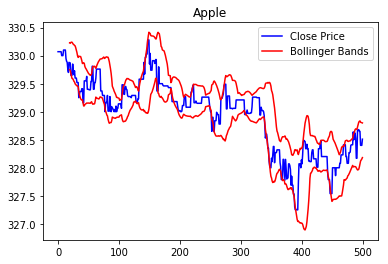

In [60]:
BB['Upper'] = BB.MA + 2*BB.sigma
BB['Lower'] = BB.MA - 2*BB.sigma
ax1 = plt.subplot()
ax1.plot(bid_ask.LastPrice[:500], color = 'b')
ax1.plot(BB.Upper[:500], color = 'r')
ax1.plot(BB.Lower[:500], color = 'r')
plt.legend(('Close Price', 'Bollinger Bands'))
plt.title('Apple')


In [61]:
sum(BB.Buy) + sum(BB.Sell)

281

In [52]:
max_investment = max(np.where(BB.Shares == 1000, 1000*bid_ask.LastPrice, 0))
max_investment

335700.0

In [53]:
summary = pd.DataFrame()
summary['Trial'] = np.arange(6) + 1
summary['P&L'] = results
summary['Return'] = results/max_investment
summary

,Trial,P&L,Return
0,1,523.0,0.001558
1,2,2250.0,0.006702
2,3,2289.0,0.006819
3,4,3503.0,0.010435
4,5,3349.0,0.009976
5,6,3079.0,0.009172


In [57]:
trader.disconnect()

True

In [253]:
n = 20
df=pd.read_csv("SQ.csv")
sqLogRet = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
SQBB = pd.DataFrame()
SQBB['Price'] = df['Adj Close']
SQBB['TP'] = (df.High+df.Low+SQBB.Price)/3
SQBB['MA'] = SQBB.TP.rolling(n).mean()
SQBB['Sigma'] = SQBB.TP.rolling(n).std()
SQBB['Upper'] = SQBB.MA + 3*SQBB.Sigma
SQBB['Lower'] = SQBB.MA - 3*SQBB.Sigma
SQBB.tail()

,Price,TP,MA,Sigma,Upper,Lower
863,72.720001,72.696668,74.081817,1.676882,79.112464,69.051170
864,72.820000,72.979998,73.928817,1.627690,78.811886,69.045747
865,73.620003,73.840335,73.832500,1.569155,78.539965,69.125035
866,67.739998,68.096667,73.389334,1.863405,78.979549,67.799118
867,68.519997,67.929998,73.029500,2.178480,79.564940,66.494060


In [246]:
n = 20
df=pd.read_csv("AAPL-3.csv")
aaplLogRet = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
AAPLBB = pd.DataFrame()
AAPLBB['Price'] = df['Adj Close']
AAPLBB['TP'] = (df.High+df.Low+AAPLBB.Price)/3
AAPLBB['MA'] = AAPLBB.TP.rolling(n).mean()
AAPLBB['Sigma'] = AAPLBB.TP.rolling(n).std()
AAPLBB['Upper'] = AAPLBB.MA + 2.5*AAPLBB.Sigma
AAPLBB['Lower'] = AAPLBB.MA - 2.5*AAPLBB.Sigma
AAPLBB.tail()

,Price,TP,MA,Sigma,Upper,Lower
1254,204.610001,204.813334,200.200500,4.622202,211.756005,188.644995
1255,200.669998,201.059998,200.731833,4.010678,210.758528,190.705138
1256,210.520004,211.686666,201.657333,4.300686,212.409048,190.905618
1257,209.149994,209.976664,202.406166,4.383572,213.365095,191.447237
1258,211.750000,211.273331,203.216499,4.452816,214.348539,192.084459


In [258]:
n = 20
df=pd.read_csv("SPY.csv")
spyLogRet = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
SPYBB = pd.DataFrame()
SPYBB['Price'] = df['Adj Close']
SPYBB['TP'] = (df.High+df.Low+SPYBB.Price)/3
SPYBB['MA'] = SPYBB.TP.rolling(n).mean()
SPYBB['Sigma'] = SPYBB.TP.rolling(n).std()
SPYBB['Upper'] = SPYBB.MA + 2*SPYBB.Sigma
SPYBB['Lower'] = SPYBB.MA - 2*SPYBB.Sigma
SPYBB.tail()

,Price,TP,MA,Sigma,Upper,Lower
1254,293.869995,293.910004,289.363002,2.389589,294.142180,284.583823
1255,294.019989,293.426666,289.761168,2.368964,294.499096,285.023241
1256,291.809998,292.853333,290.115668,2.267542,294.650753,285.580584
1257,291.179993,291.133331,290.340168,2.123351,294.586870,286.093465
1258,294.029999,293.223328,290.657168,2.052173,294.761514,286.552821


Text(0, 0.5, 'Price')

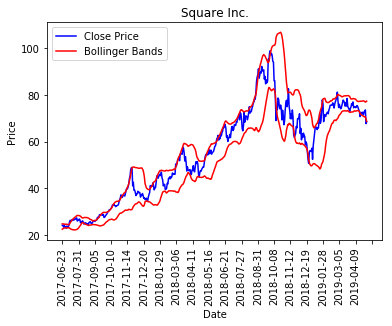

In [42]:
ax1 = plt.subplot()
ax1.plot(df.Date[791:], SQBB.Price[400:], color = 'b')
ax1.plot(df.Date[791:], SQBB.Upper[400:], color = 'r')
ax1.plot(df.Date[791:], SQBB.Lower[400:], color = 'r')
ax1.xaxis.set_major_locator(plt.MaxNLocator(25))
plt.xticks(rotation = 90)
plt.legend(('Close Price', 'Bollinger Bands'))
plt.title('Square Inc.')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

Text(0, 0.5, 'Price')

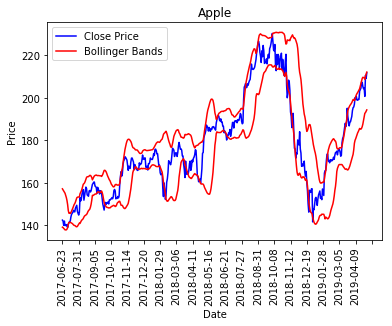

In [40]:
ax1 = plt.subplot()
ax1.plot(df.Date[791:], AAPLBB.Price[791:], color = 'b')
ax1.plot(df.Date[791:], AAPLBB.Upper[791:], color = 'r')
ax1.plot(df.Date[791:], AAPLBB.Lower[791:], color = 'r')
ax1.xaxis.set_major_locator(plt.MaxNLocator(25))
plt.xticks(rotation = 90)
plt.legend(('Close Price', 'Bollinger Bands'))
plt.title('Apple')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

Text(0, 0.5, 'Price')

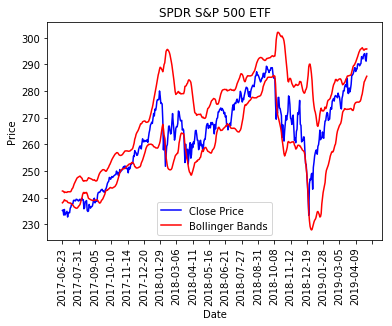

In [136]:
ax1 = plt.subplot()
ax1.plot(df.Date[791:], SPYBB.Price[791:], color = 'b')
ax1.plot(df.Date[791:], SPYBB.Upper[791:], color = 'r')
ax1.plot(df.Date[791:], SPYBB.Lower[791:], color = 'r')
ax1.xaxis.set_major_locator(plt.MaxNLocator(25))
plt.xticks(rotation = 90)
plt.legend(('Close Price', 'Bollinger Bands'))
plt.title('SPDR S&P 500 ETF')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

In [256]:
SQtrades = pd.DataFrame()
SQtrades['Buy'] = np.where((SQBB.Price < SQBB.Lower) & (SQBB.Price.shift(1) >= SQBB.Lower.shift(1)), 1, 0)
SQtrades['Sell'] = np.where((SQBB.Price > SQBB.Upper) & (SQBB.Price.shift(1) <= SQBB.Upper.shift(1)), 1, 0)
SQtrades['Shares'] = 0
SQtrades['PandL'] = 0
for i in range(1,len(SQtrades.Shares)):
        if (SQtrades.Buy[i] == 1) & (SQtrades.Shares[i-1] < 1000):
            SQtrades.Shares[i] = SQtrades.Shares[i-1] + 100
            SQtrades.PandL[i] = SQtrades.PandL[i-1] - 100*SQBB.Price[i]
        elif (SQtrades.Sell[i] == 1 ) & (SQtrades.Shares[i-1] > 0):
            SQtrades.Shares[i] = SQtrades.Shares[i-1] - 100
            SQtrades.PandL[i] = SQtrades.PandL[i-1] + 100*SQBB.Price[i]
        else:
            SQtrades.Shares[i] = SQtrades.Shares[i-1]
            SQtrades.PandL[i] = SQtrades.PandL[i-1]

SQend = SQtrades.PandL[i] + SQtrades.Shares[i]*SQBB.Price[i]
SQend

13.999400000000605

In [257]:
port = SQtrades.Shares*SQBB.Price
SQstratret = (port - port.shift(1))/abs(port.shift(1))
SQstratret.fillna(0,inplace = True)
for i in range(0,len(SQtrades.Buy)):
    if SQstratret[i] > 1:
        SQstratret[i] = 0
SQmeanret = np.mean(SQstratret)*252/5
SQstratvol = np.std(SQstratret[1:])*math.sqrt(252)/5
SQstratSR = SQmeanret/SQstratvol

results = [(SQmeanret*100,SQstratvol*100,SQstratSR),
           (np.mean(sqLogRet)*100*252,np.std(sqLogRet)*100*math.sqrt(252),np.mean(sqLogRet)/np.std(sqLogRet)*math.sqrt(252))]
SQtable = pd.DataFrame(results, columns = ['Mean Return', 'Volatility', 'Sharpe Ratio'],
                       index = ['Bollinger Bands','Buy & Hold'])
SQtable

,Mean Return,Volatility,Sharpe Ratio
Bollinger Bands,0.007394,14.329267,0.000516
Buy & Hold,48.156302,50.073945,0.961704


In [204]:
(SQBB.Price[len(SQBB.Price)-1] - SQBB.Price[0])/SQBB.Price[0]
np.mean(SQstratret)*252
#np.cumsum(sqLogRet)[867]
SQstratSR

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    0
Name: Buy, dtype: int64

In [247]:
AAPLtrades = pd.DataFrame()
AAPLtrades['Buy'] = np.where((AAPLBB.Price < AAPLBB.Lower) & (AAPLBB.Price.shift(1) >= AAPLBB.Lower.shift(1)), 1, 0)
AAPLtrades['Sell'] = np.where((AAPLBB.Price > AAPLBB.Upper) & (AAPLBB.Price.shift(1) <= AAPLBB.Lower.shift(1)), 1, 0)
AAPLtrades['Shares'] = 0
AAPLtrades['PandL'] = 0
for i in range(1,len(AAPLtrades.Shares)):
        if (AAPLtrades.Buy[i] == 1) & (AAPLtrades.Shares[i-1] < 1000):
            AAPLtrades.Shares[i] = AAPLtrades.Shares[i-1] + 100
            AAPLtrades.PandL[i] = AAPLtrades.PandL[i-1] - 100*AAPLBB.Price[i]
        elif (AAPLtrades.Sell[i] == 1 ) & (AAPLtrades.Shares[i-1] > 0):
            AAPLtrades.Shares[i] = AAPLtrades.Shares[i-1] - 100
            AAPLtrades.PandL[i] = AAPLtrades.PandL[i-1] + 100*AAPLBB.Price[i]
        else:
            AAPLtrades.Shares[i] = AAPLtrades.Shares[i-1]
            AAPLtrades.PandL[i] = AAPLtrades.PandL[i-1]

AAPLend = AAPLtrades.PandL[i] + AAPLtrades.Shares[i]*AAPLBB.Price[i]
AAPLend

117664.0

In [248]:
port = AAPLtrades.Shares*AAPLBB.Price
AAPLstratret = (port - port.shift(1))/abs(port.shift(1))
AAPLstratret.fillna(0,inplace = True)
for i in range(0,len(AAPLtrades.Buy)):
    if AAPLtrades.Buy[i] == 1:
        AAPLstratret[i] = 0
        break
AAPLmeanret = np.mean(AAPLstratret)*252/5
AAPLstratvol = np.std(AAPLstratret[1:])*math.sqrt(252)/5
AAPLstratSR = AAPLmeanret/AAPLstratvol

results = [(AAPLmeanret*100,AAPLstratvol*100,AAPLstratSR),
           (np.mean(aaplLogRet)*100*252,np.std(aaplLogRet)*100*math.sqrt(252),np.mean(aaplLogRet)/np.std(aaplLogRet)*math.sqrt(252))]
AAPLtable = pd.DataFrame(results, columns = ['Mean Return', 'Volatility', 'Sharpe Ratio'],
                       index = ['Bollinger Bands','Buy & Hold'])
AAPLtable

,Mean Return,Volatility,Sharpe Ratio
Bollinger Bands,15.458971,11.635162,1.328642
Buy & Hold,20.547960,24.291419,0.845894


In [259]:
SPYtrades = pd.DataFrame()
SPYtrades['Buy'] = np.where(((SPYBB.Price < SPYBB.Lower) & (SPYBB.Price.shift(1) >= SPYBB.Lower.shift(1))), 1, 0)
SPYtrades['Sell'] = np.where(((SPYBB.Price > SPYBB.Upper) & (SPYBB.Price.shift(1) <= SPYBB.Lower.shift(1))), 1, 0)
SPYtrades['Shares'] = 0
SPYtrades['PandL'] = 0
for i in range(1,len(SPYtrades.Shares)):
        if (SPYtrades.Buy[i] == 1) & (SPYtrades.Shares[i-1] < 1000):
            SPYtrades.Shares[i] = SPYtrades.Shares[i-1] + 100
            SPYtrades.PandL[i] = SPYtrades.PandL[i-1] - 100*SPYBB.Price[i]
        elif (SPYtrades.Sell[i] == 1) & (SPYtrades.Shares[i-1] > 0):
            SPYtrades.Shares[i] = SPYtrades.Shares[i-1] - 100
            SPYtrades.PandL[i] = SPYtrades.PandL[i-1] + 100*SPYBB.Price[i]
        else:
            SPYtrades.Shares[i] = SPYtrades.Shares[i-1]
            SPYtrades.PandL[i] = SPYtrades.PandL[i-1]

if SPYtrades.Shares[i] > 0:
    SPYend = SPYtrades.PandL[i] + SPYtrades.Shares[i]*SPYBB.Price[i]
else:
    SPYend = SPYtrades.PandL[i] - SPYtrades.Shares[i]*SPYBB.Price[i]
SPYend

106056.99900000001

In [260]:
port = SPYtrades.Shares*SPYBB.Price
SPYstratret = (port - port.shift(1))/abs(port.shift(1))
SPYstratret.fillna(0,inplace = True)
for i in range(0,len(SPYtrades.Buy)):
    if SPYtrades.Buy[i] == 1:
        SPYstratret[i] = 0
        break
SPYmeanret = np.mean(SPYstratret)*252/5
SPYstratvol = np.std(SPYstratret[1:])*math.sqrt(252)/5
SPYstratSR = SPYmeanret/SPYstratvol

results = [(SPYmeanret*100,SPYstratvol*100,SPYstratSR),
           (np.mean(spyLogRet)*100*252,np.std(spyLogRet)*100*math.sqrt(252),np.mean(spyLogRet)/np.std(spyLogRet)*math.sqrt(252))]
SPYtable = pd.DataFrame(results, columns = ['Mean Return', 'Volatility', 'Sharpe Ratio'],
                       index = ['Bollinger Bands','Buy & Hold'])
SPYtable

,Mean Return,Volatility,Sharpe Ratio
Bollinger Bands,13.193996,11.098716,1.188786
Buy & Hold,10.899214,13.230430,0.823799


In [223]:
SQend/-min(SQtrades.PandL)
SQend

5742.999400000001

In [255]:
AAPLtrades.tail(30)

,Buy,Sell,Shares,PandL
1229,0,0,1000,-94086
1230,0,0,1000,-94086
1231,0,0,1000,-94086
1232,0,0,1000,-94086
1233,0,0,1000,-94086
1234,0,0,1000,-94086
1235,0,0,1000,-94086
1236,0,0,1000,-94086
1237,0,0,1000,-94086
1238,0,0,1000,-94086
